In [1]:

# !pip install ipykernel

import os 

os.chdir('/home/DISCOVER_summer2022/xusc/exp/Cerberus-main')
# from dataloaders.datasets.nyud_geonet import NYUD_GeoNet

from dataloaders.datasets.nyud2 import Nyud2
from dataloaders.datasets.nyud_geonet import *




import matplotlib.pyplot as plt
import numpy as np 
import cv2
import torchvision.transforms as transforms
from utils import  * 
from PIL import Image
import math
import torch.nn.functional as F
from plot.plot_main_pic import dilation
import copy

from eval_tools.iiw_evaluator import IIWEvaluator

#* initial
# plt.rcParams['figure.figsize'] = (8.0, 2.0) # 设置figure_size尺寸
# plt.rcParams['image.interpolation'] = 'nearest' # 设置 interpolation style
# plt.rcParams['image.cmap'] = 'gray' # 设置 颜色 style
plt.rcParams['savefig.dpi'] = 300 #图片像素
plt.rcParams['figure.dpi'] = 300 #分辨率
# 默认的像素：[6.0,4.0]，分辨率为100，图片尺寸为 600&400

import os.path as osp
from os.path import split,join,exists


from tqdm import tqdm


Bad key text.latex.preview in file /home/DISCOVER_summer2022/xusc/.conda/envs/uav/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /home/DISCOVER_summer2022/xusc/.conda/envs/uav/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /home/DISCOVER_summer2022/xusc/.conda/envs/uav/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 418 ('s

In [16]:
pred_path = "/home/DISCOVER_summer2022/xusc/exp/Cerberus-main/networks/need2release/nyud2_1/depth/nms"

gt_path = "/home/DISCOVER_summer2022/xusc/exp/Cerberus-main/data/nyud2/NYU_origin/cropped/nyu_depth_edge_canny"


def get_files(path):
    return sorted(os.listdir(path))


pred_files = get_files(pred_path)
# gt_files = get_files(gt_path)

(426, 560, 3) (426, 560, 3)


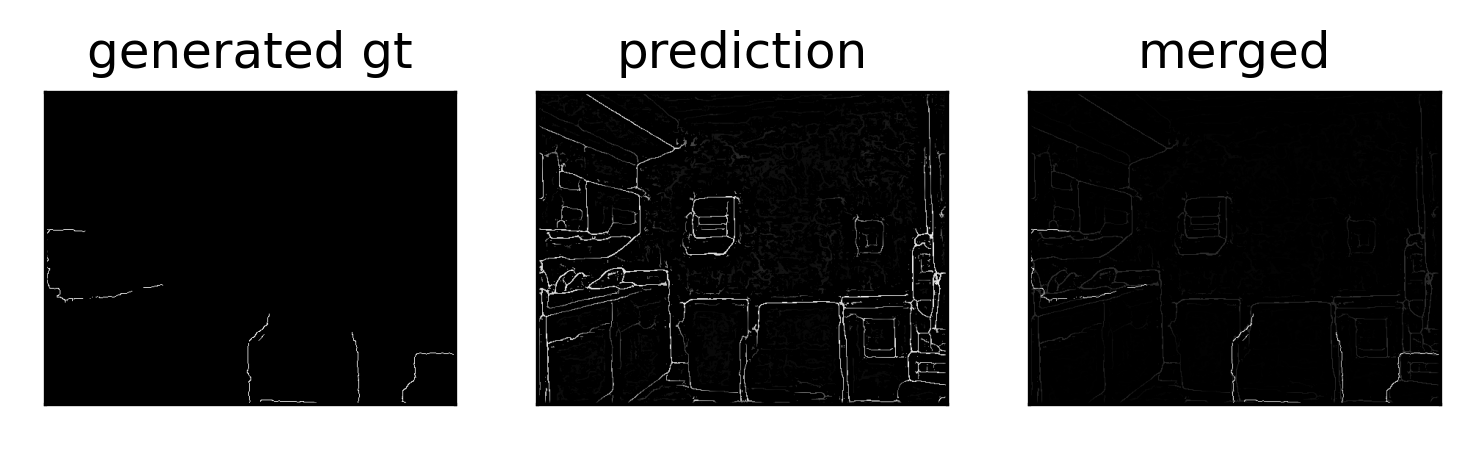

In [22]:
# len(gt_files),len(pred_files)

for idx,f in enumerate(pred_files):
    
    gt = imread(join(gt_path,f))
    pred = imread(join(pred_path,f))
    
    print(gt.shape,pred.shape)

    merged = merge_images(gt,0.8,pred,0.2)
    
    show_imgs([gt,pred,merged],[0,0,0],['generated gt','prediction','merged'])

    if idx ==0:

        break

['605.png',
 '33.png',
 '1275.png',
 '445.png',
 '693.png',
 '1274.png',
 '8.png',
 '88.png',
 '934.png',
 '189.png',
 '591.png',
 '637.png',
 '849.png',
 '1077.png',
 '411.png',
 '1122.png',
 '678.png',
 '524.png',
 '1182.png',
 '839.png',
 '616.png',
 '351.png',
 '1152.png',
 '1384.png',
 '958.png',
 '1430.png',
 '283.png',
 '1207.png',
 '195.png',
 '1448.png',
 '1383.png',
 '507.png',
 '650.png',
 '649.png',
 '644.png',
 '1149.png',
 '309.png',
 '221.png',
 '1102.png',
 '1161.png',
 '685.png',
 '619.png',
 '857.png',
 '211.png',
 '686.png',
 '174.png',
 '1444.png',
 '868.png',
 '1390.png',
 '1048.png',
 '536.png',
 '332.png',
 '1203.png',
 '515.png',
 '1105.png',
 '1174.png',
 '1290.png',
 '520.png',
 '1156.png',
 '1367.png',
 '732.png',
 '446.png',
 '1445.png',
 '334.png',
 '1249.png',
 '1002.png',
 '17.png',
 '1195.png',
 '724.png',
 '525.png',
 '1226.png',
 '325.png',
 '1175.png',
 '780.png',
 '723.png',
 '410.png',
 '593.png',
 '1338.png',
 '153.png',
 '1093.png',
 '991.png',
 '